# Importing the Data
### by: TM

In [1]:
# Installing packages
!pip install ibllib

In [2]:
# @title Import the packages
import numpy as np
import matplotlib.pyplot as plt
from oneibl.onelight import ONE
import os

one = ONE()

In [3]:
# @title Set some global variables
figsize = [12,12]
dpi = 400

In [4]:
# @title Setting up helper functions
def load_data(sn):
    """ loads the data to RAM.
    Args
        - inputs:
            sn: (np.1darray) the number of the desired session
        - outputs:
            spikes: (dict) dictionary including spike data
            wheelmoves: (dict) dictionary including wheel movement data
    """
    session = sessions[sn];
    spikes = one.load_object(session, 'spikes');
    wheelmoves = one.load_object(session, 'wheelMoves');
    return spikes, wheelmoves
    
def plot_session_raster(sn):
    """ plots the raster for the spikes on the specified session number (sn) from the ONE data.
        Args:
        - inputs:
            sn: (np.1darray) the number of the desired session
        - outputs:
            1. matplotlib figure
            2. also saves it to the $pwd as "%$sn.png".
    """
    spikeraster = plt.figure(figsize=figsize, dpi=dpi);
    spikeraster = plt.axis("off");
    spikeraster = plt.plot(sp, cl, ',');
    spikeraster = plt.vlines(wheelmoves['intervals'], 0, max(spikes['clusters']), 'r', lw=0.1)
    plt.savefig("%s.png" % sn, dpi=dpi)
    
def plot_trial_raster(tn):
    """ plots the raster for the spikes on the specified trial number (tn) from the ONE data.
        Args:
        - inputs:
            tn: (np.1darray) the number of the desired trial
        - outputs:
            matplotlib.plt figure
    """
    spikeraster = plt.figure(figsize=[4,4], dpi=dpi/6);
    spikeraster = plt.axis("off");
    spikeraster = plt.plot((trials[tn])[0],(trials[tn])[1], ',');

In [16]:
# # @title **[do not run]** Download the files from source (No need to run. The files are already stored in the GDrive, and are also availble through ONE)
# # Run this field if you do not have the necessary files on GDrive. This will take approx 15 GB of space ~35-40 min of time!


# !unzip "!wget https://ndownloader.figshare.com/articles/9974357/versions/2"
# %cp /content/nicklab* '/content/gdrive/My Drive/Project/Datasets/Steinemtz/Train' -rv

----
### Import data from FigShare to `ONE`
Run this field if you prefer to work from the online data. The API will only download the files you specify with `load_object`.

In [5]:
# # Import from this link:

one.set_figshare_url("https://figshare.com/articles/steinmetz/9974357");
sessions = one.search(['spikes'])
sessions

['nicklab/Subjects/Cori/2016-12-14/001',
 'nicklab/Subjects/Cori/2016-12-17/001',
 'nicklab/Subjects/Cori/2016-12-18/001',
 'nicklab/Subjects/Forssmann/2017-11-01/001',
 'nicklab/Subjects/Forssmann/2017-11-02/001',
 'nicklab/Subjects/Forssmann/2017-11-04/001',
 'nicklab/Subjects/Forssmann/2017-11-05/001',
 'nicklab/Subjects/Hench/2017-06-15/001',
 'nicklab/Subjects/Hench/2017-06-16/001',
 'nicklab/Subjects/Hench/2017-06-17/001',
 'nicklab/Subjects/Hench/2017-06-18/001',
 'nicklab/Subjects/Lederberg/2017-12-05/001',
 'nicklab/Subjects/Lederberg/2017-12-06/001',
 'nicklab/Subjects/Lederberg/2017-12-07/001',
 'nicklab/Subjects/Lederberg/2017-12-08/001',
 'nicklab/Subjects/Lederberg/2017-12-09/001',
 'nicklab/Subjects/Lederberg/2017-12-10/001',
 'nicklab/Subjects/Lederberg/2017-12-11/001',
 'nicklab/Subjects/Moniz/2017-05-15/001',
 'nicklab/Subjects/Moniz/2017-05-16/001',
 'nicklab/Subjects/Moniz/2017-05-18/001',
 'nicklab/Subjects/Muller/2017-01-07/001',
 'nicklab/Subjects/Muller/2017-01-

## The list of the sessions:
- The first 5 (0 through 4) are the test set
- The second 5 (5 through 9) are the validation set
- The other 29 (10 through 38) are the training set

## Import to RAM:
The choice `sn` sets the session number from the list above.

We will use the helper functions `load_data` and `plot_raster` to repsectively import the data from ONE API and to plot the raster plot based on the times and clusters of neurons. ONE API uses `memmaps`, which means the matrices stay in the long-term storage and only a soft link is stored in storage, until immutations are done.


In [25]:
sn = 16

spikes, wheelmoves = load_data(sn)

sp = spikes['times'][:,0]  # spike times
cl = spikes['clusters'][:,0]   # spike clusters
am = spikes['amps'][:,0]
ints = wheelmoves['intervals']  # intervals of moving the wheel [in seconds]

# Extracting metadata:
srate = len(spikes['times'])/spikes['times'][-1]
dt = 1/srate


intpts = ints * srate  # intervals of moving the wheel [datapoints]
intpts = np.round(intpts).astype(int)
moves = wheelmoves['intervals'][:,1]-wheelmoves['intervals'][:,0]  # length of each interval
wmt = wheelmoves['type']

# ## Clean up the wheel moves. Some seem to have NaN or abnormal activity recorded,
# ## we will discard those as immobile. Immutes the dict:

for i in range(len(wmt)):
    if wmt[i][0]==3:
        wmt[i][0] = 0

print('Sampling rate of this set is approximately %s Hz' % round(srate[0],2))

Sampling rate of this set is approximately 1978.12 Hz


This will yield two dictionaries:
#### **1.** `spikes`
- `amps`: **amplitudes of the spikes**
- `clusters`:  **spatial index (location)** 
- `depths`: **diff between the amplitudes of the spike and the directly previous spike"
- `times`: **temporal index**

We will mainly use the `clusters` and the `times` of the spikes.

#### **2.** `wheels`
with the keys:
- `position`
- `timestamps`

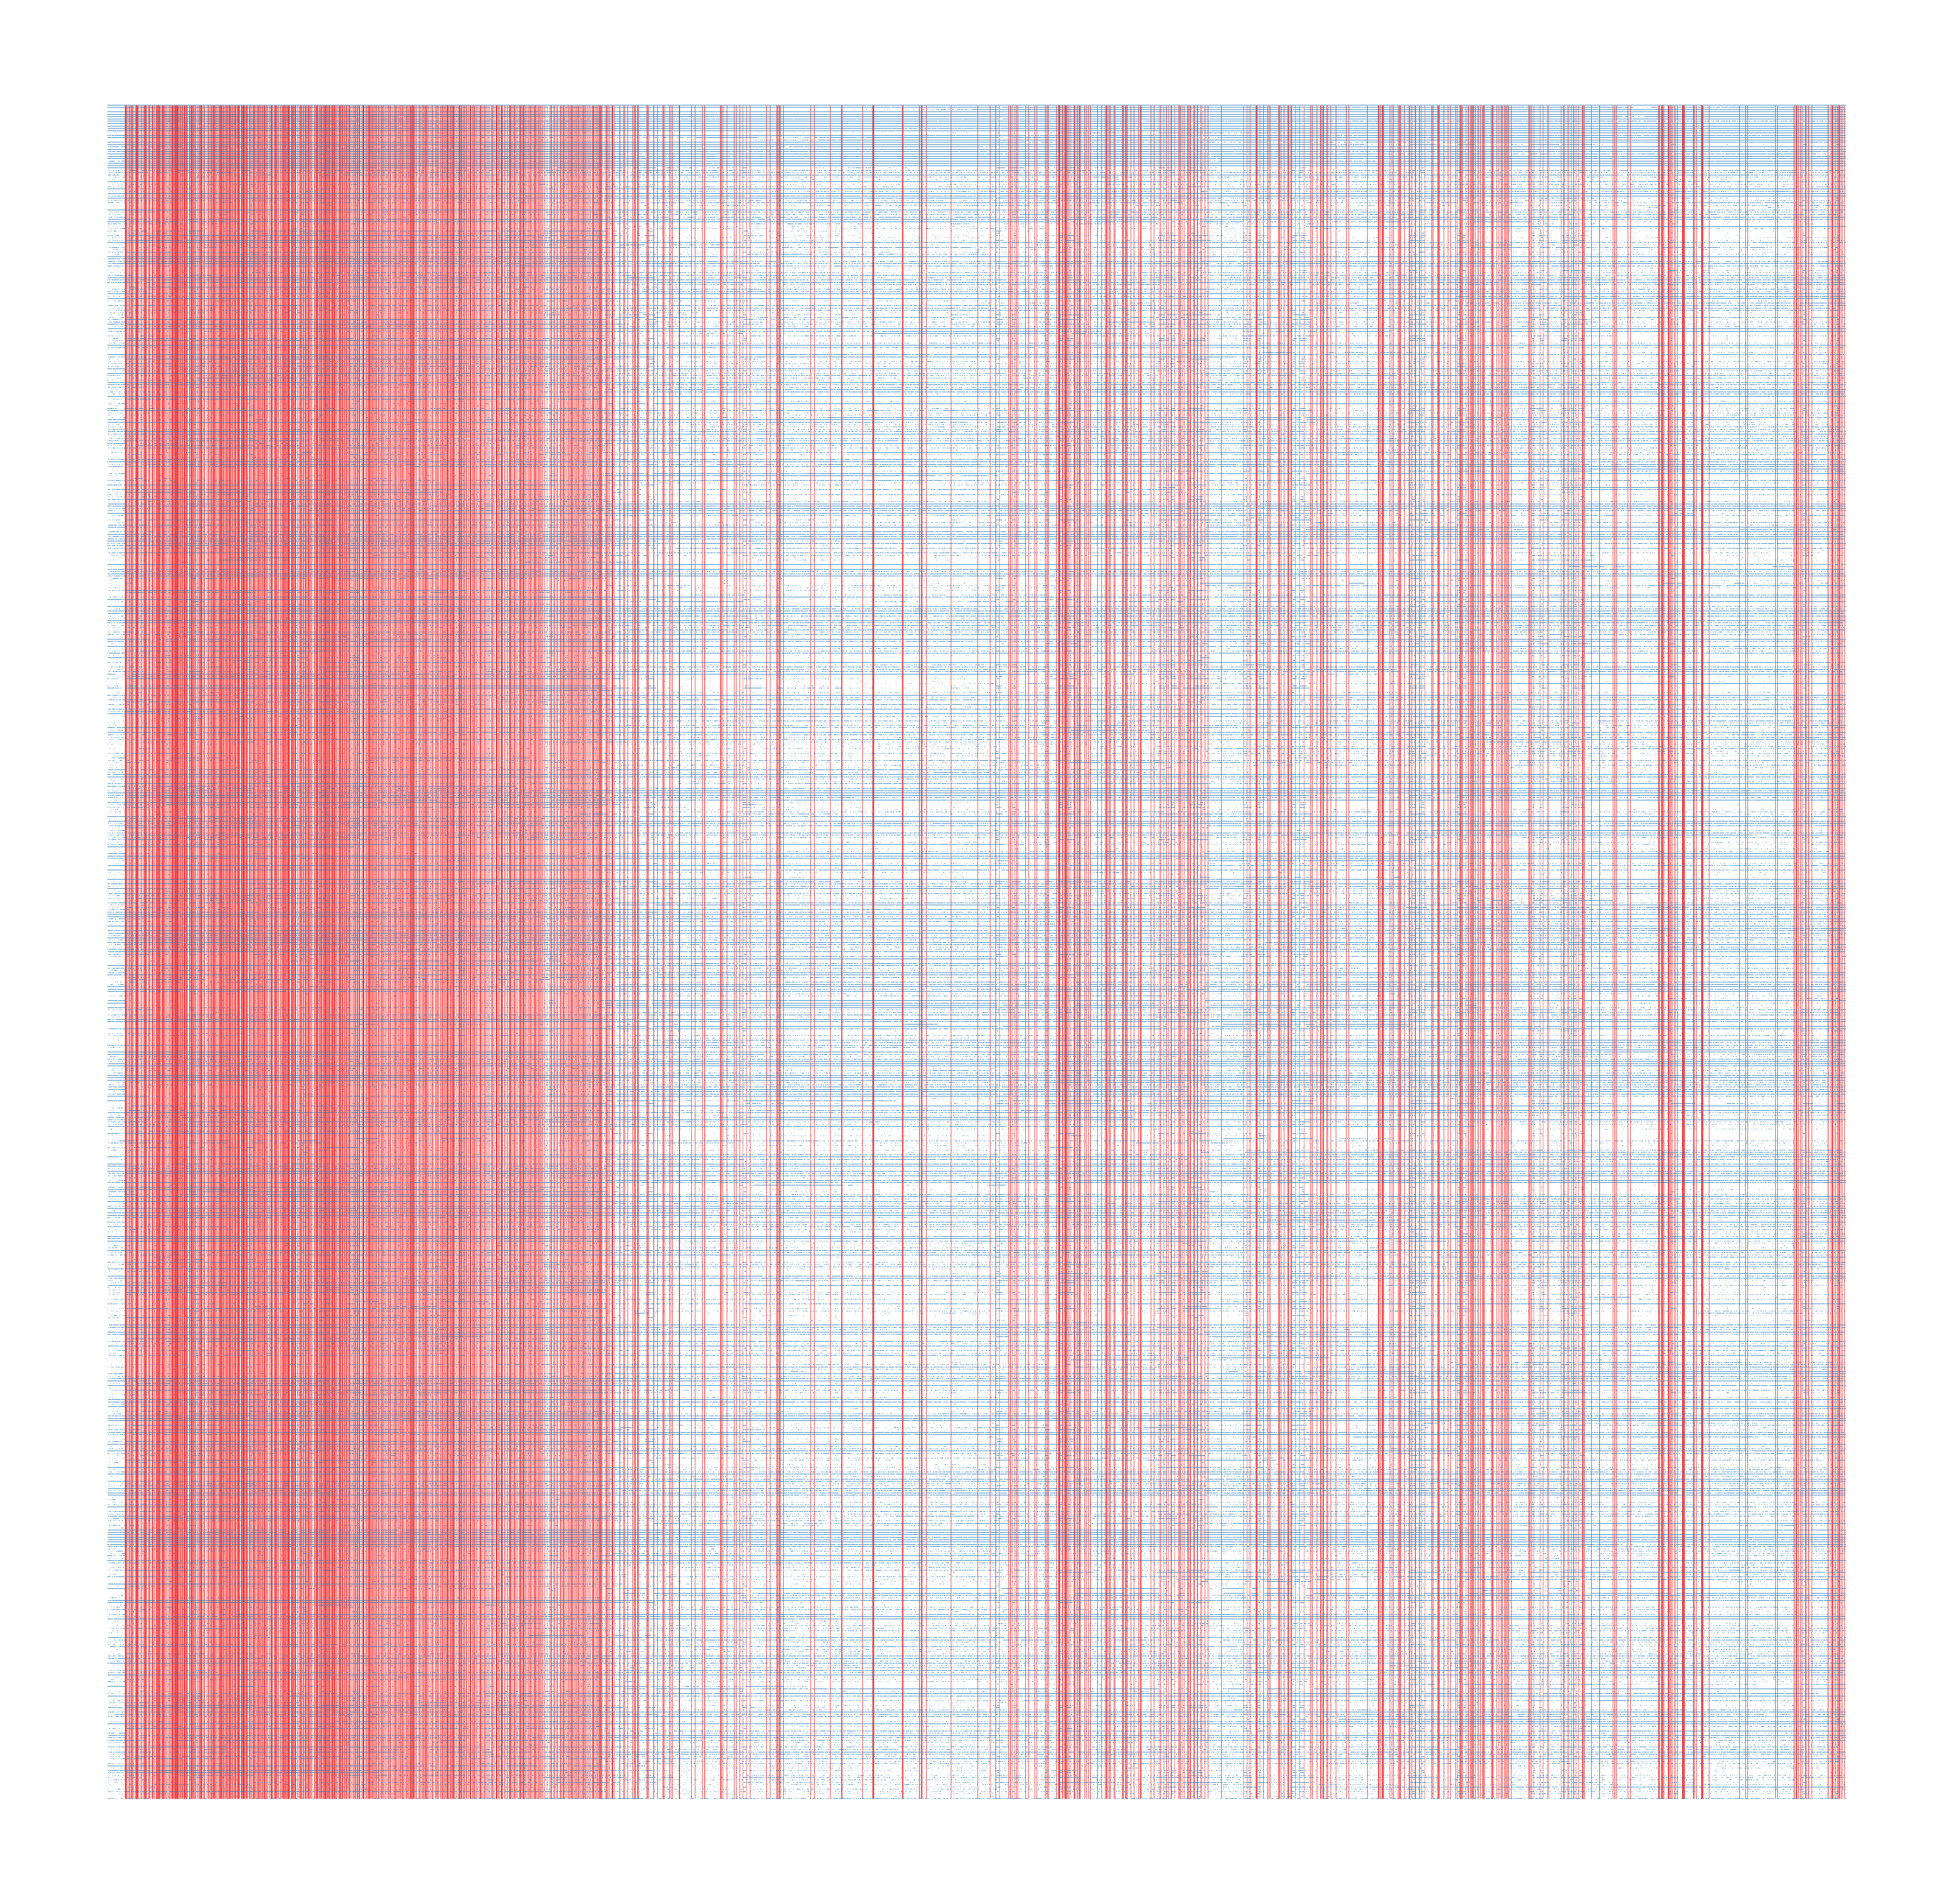

In [21]:
# Raster plot of all spikes based on `sp` and `cl` in the whole session

plot_session_raster(sn)

## Extracting the events from the dataset

The extracted data are:
- `trials[i][0]`: spike timing
- `trials[i][1]`: spike location (cluster)
- `trials[i][2]`: spike amplitude
- `wmt[i]`: wheel movement type. `0`=flinch or motionless `1`=clockwise, `2`=counterclockwise

In [26]:
trials = [np.hstack([np.vstack([[sp[intpts[i,0]:intpts[i,1]]],
                                [cl[intpts[i,0]:intpts[i,1]]],
                                [am[intpts[i,0]:intpts[i,1]]]])]) for i in range(len(ints))]

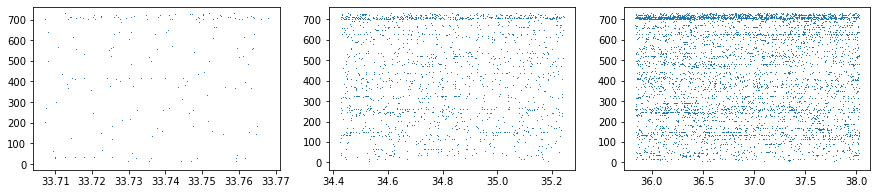

In [35]:
# To test: print rasters from the first three trials
n=3
figt = plt.figure(figsize=[15,3]);
for i in range(1,n+1):
    axt1 = figt.add_subplot(1,n,i);
    axt1.plot(trials[i][0],trials[i][1], ',');

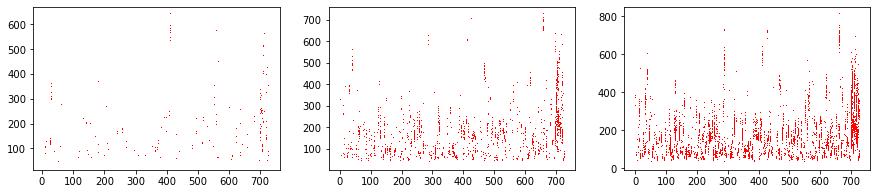

In [40]:
# To test: print rasters from the first three trials
n=3
figt = plt.figure(figsize=[15,3]);
for i in range(1,n+1):
    axt1 = figt.add_subplot(1,n,i);
    axt1.plot(trials[i][1],trials[i][2], 'r,');

In [286]:
t_trial = np.stack([trials[2][0],trials[2][1],trials[2][2]])
t_vert = np.stack([trials[2][0],trials[2][1]])
print(np.shape(t_trial))

(3, 1490)


In [125]:
test = np.array(trials[0])
print(np.shape(test))

old_min = np.amin(test[0])
old_max = np.amax(test[0])
new_min = 0
new_max = 750

old_range = old_max - old_min
new_range = new_max - new_min

test[0] = ((test[0] - old_min) * new_range / old_range) + new_min

print(np.amin(test[0]), np.amax(test[0]))

# ((oldValue - oldMin) * newRange / oldRange) + newMin




(3, 184)
0.0 750.0


In [127]:
print(test[0][0], test[0][1], test[0][2])

test[0] = test[0].astype(int)
test[1] = test[1].astype(int)

print(test[0][0], test[0][1], test[0][2])
print(test[1][0], test[1][1], test[1][2])
print(test[2][0], test[2][1], test[2][2])



0.0 10.036496350373955 13.38199513381033
0.0 10.0 13.0
3.0 388.0 700.0
82.42409061770634 279.7801679084582 299.8878402917727


In [140]:
matrix = np.zeros((751, 751))
matrix[test[0].astype(int),test[1].astype(int)] = test[2]

82.42409061770634 0.0


In [167]:
# print(wmt)
print(matrix.shape)

(751, 751)


In [172]:
conv_data_trials = trials.copy()
matrix_of_trials = np.zeros((len(trials), 751, 751))

new_min = 0
new_max = 750

for i, trial in enumerate(conv_data_trials):
    trial = np.array(trial)
    old_min = np.amin(trial[0])
    old_max = np.amax(trial[0])

    old_range = old_max - old_min
    new_range = new_max - new_min

    trial[0] = ((trial[0] - old_min) * new_range / old_range) + new_min
    matrix_of_trials[i, trial[0].astype(int), trial[1].astype(int)] = trial[2]
    

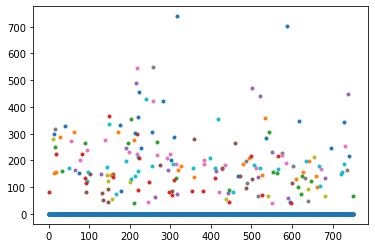

In [173]:
plt.plot(matrix_of_trials[0], '.')
plt.show()

In [222]:
train_data = []
single_vector_wmt = np.squeeze(wmt)
for i in range(len(trials)):
    train_data.append([np.expand_dims(matrix_of_trials[i], axis=0).astype(float), single_vector_wmt[i]])

In [236]:
trainloader = torch.utils.data.DataLoader(train_data[:500], shuffle=True, batch_size=32)
i1, l1 = next(iter(trainloader))
print(i1.shape)

torch.Size([32, 1, 751, 751])


In [ ]:
print(l1.shape)

In [299]:
### Full Data Acquisition
from math import ceil

demo_ratio = .05
val_ratio = .15
test_ratio = .15
train_ratio = 1 - (demo_ratio + val_ratio + test_ratio)

last_session_idx = 38
demo_idx = ceil(last_session_idx * demo_ratio)
val_idx = demo_idx + ceil(last_session_idx * val_ratio)
test_idx = val_idx + ceil(last_session_idx * test_ratio)
train_idx = test_idx + ceil(last_session_idx * train_ratio)

print("demo: 0-{}; val: {}-{}; test: {}-{}; train: {}-{}".format(
    demo_idx-1,
    demo_idx, val_idx-1,
    val_idx, test_idx-1,
    test_idx, train_idx-1
))

demo: 0-1; val: 2-7; test: 8-13; train: 14-38


In [315]:
def get_session_data(sn: int):
    spikes, wheelmoves = load_data(sn)

    sp = spikes['times'][:,0]  # spike times
    cl = spikes['clusters'][:,0]   # spike clusters
    am = spikes['amps'][:,0]
    ints = wheelmoves['intervals']  # intervals of moving the wheel [in seconds]

    # Extracting metadata:
    srate = len(spikes['times'])/spikes['times'][-1]
    dt = 1/srate


    intpts = ints * srate  # intervals of moving the wheel [datapoints]
    intpts = np.round(intpts).astype(int)
    moves = wheelmoves['intervals'][:,1]-wheelmoves['intervals'][:,0]  # length of each interval
    wmt = wheelmoves['type']

    # ## Clean up the wheel moves. Some seem to have NaN or abnormal activity recorded,
    # ## we will discard those as immobile. Immutes the dict:

    for i in range(len(wmt)):
        if wmt[i][0]==3:
            wmt[i][0] = 0
            
    trials = [np.hstack([np.vstack([[sp[intpts[i,0]:intpts[i,1]]],
                                    [cl[intpts[i,0]:intpts[i,1]]],
                                    [am[intpts[i,0]:intpts[i,1]]]])]) for i in range(len(ints))]
    new_min = 0
    new_max = 1899
    matrix_of_trials = np.zeros((len(trials), new_max+1, new_max+1))

    for i, trial in enumerate(trials):
        trial = np.array(trial)
        old_min = np.amin(trial[0])
        old_max = np.amax(trial[0])

        old_range = old_max - old_min
        new_range = new_max - new_min

        trial[0] = ((trial[0] - old_min) * new_range / old_range) + new_min
        matrix_of_trials[i, trial[0].astype(int), trial[1].astype(int)] = trial[2]
        
    session_data = []
    single_vector_wmt = np.squeeze(wmt)
    for i in range(len(trials)):
        session_data.append([np.expand_dims(matrix_of_trials[i], axis=0).astype(float), single_vector_wmt[i]])
        
    return session_data

In [316]:
demo_data, val_data, test_data, train_data = [], [], [], []
for sn in range(demo_idx):
    print(sn)
    demo_data.extend(get_session_data(sn=sn))
    
for sn in range(demo_idx, val_idx):
    print(sn)
    val_data.extend(get_session_data(sn=sn))
    
for sn in range(val_idx, test_idx):
    print(sn)
    test_data.extend(get_session_data(sn=sn))
    
for sn in range(test_idx, train_idx):
    print(sn)
    train_data.extend(get_session_data(sn=sn))
    
print([len(data) for data in [demo_data, val_data, test_data, train_data]])

0
1
2


MemoryError: Unable to allocate 16.6 GiB for an array with shape (616, 1900, 1900) and data type float64

## Build Baseline Model - CNN


In [180]:
import torch
import numpy as np

import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms

In [231]:
output_channels_1 = 32
output_channels_2 = 64
output_channels_3 = 128
k = 5

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "CNN"
        self.conv1 = nn.Conv2d(1, output_channels_1, k)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(output_channels_1, output_channels_2, k)
        self.conv3 = nn.Conv2d(output_channels_2, output_channels_3, k)
        self.fc1 = nn.Linear(output_channels_3 * 90 * 90, output_channels_1)
        self.fc2 = nn.Linear(output_channels_1, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
#         print(x.shape)
        x = x.view(-1, output_channels_3 * 90 * 90)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        return x

In [211]:
def get_dataloader(data_set: str, batch_size: int = 64):
    return trainloader

In [226]:
def train(model, learning_rate=0.01, epochs=5, batch_size=64, use_toy_data=False):
    torch.manual_seed(360)

    if use_toy_data:
        train_loader = get_dataloader(data_set='toy', batch_size=batch_size)
        val_loader = get_dataloader(data_set='toy', batch_size=batch_size)
    else:
        train_loader = get_dataloader(data_set='train', batch_size=batch_size)
        val_loader = get_dataloader(data_set='val', batch_size=batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_acc = np.zeros(epochs)
    train_loss = np.zeros(epochs)
    val_acc = np.zeros(epochs)
    val_loss = np.zeros(epochs)

    for epoch in range(epochs):
        for images, labels in train_loader:
            if use_cuda and torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            out = model(images.float()) # forward pass
            loss = criterion(out, labels.long()) # compute the total loss
            loss.backward() # backward pass (compute parameter updates)
            optimizer.step() # make the updates for each parameter
            optimizer.zero_grad() # a clean up step for PyTorch

        train_acc[epoch], train_loss[epoch] = get_accuracy_and_loss(model, criterion, train_loader)
        val_acc[epoch], val_loss[epoch] = get_accuracy_and_loss(model, criterion, val_loader)

        print("epoch: {} | train acc: {} | train loss: {} | val acc: {} | val loss: {}".format(epoch, train_acc[epoch], train_loss[epoch], val_acc[epoch], val_loss[epoch]))

    return train_acc, train_loss, val_acc, val_loss

In [228]:
def get_accuracy_and_loss(model, criterion, data_loader) -> tuple:
    total_acc = 0.0
    total_loss = 0.0
    total_epoch = 0
    for i, data in enumerate(data_loader, 0):
        imgs, labels = data
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

        output = model(imgs.float())
        loss = criterion(output, labels.long())
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct = pred.eq(labels.view_as(pred)).sum().item()

        total_acc += correct
        total_loss += loss.item()
        total_epoch += len(labels)
    
    acc = float(total_acc) / total_epoch
    loss = float(total_loss) / (i + 1)

    return acc, loss

In [291]:
# try training

use_cuda = True
lr = 0.001
epochs = 10
batch_size = 10

model = CNN()

if use_cuda and torch.cuda.is_available():
    print("using cuda!")
    model.cuda()

train_acc = train(model, learning_rate=lr, epochs=epochs, batch_size=batch_size, use_toy_data=True)

epoch: 0 | train acc: 0.624 | train loss: 0.7681468836963177 | val acc: 0.624 | val loss: 0.7716096304357052
epoch: 1 | train acc: 0.808 | train loss: 0.5204605031758547 | val acc: 0.808 | val loss: 0.5170412845909595
epoch: 2 | train acc: 0.822 | train loss: 0.3049114728346467 | val acc: 0.822 | val loss: 0.3115422436967492
epoch: 3 | train acc: 0.824 | train loss: 0.24537926632910967 | val acc: 0.824 | val loss: 0.24663653643801808
epoch: 4 | train acc: 0.824 | train loss: 0.22041527181863785 | val acc: 0.824 | val loss: 0.21995464619249105
epoch: 5 | train acc: 0.824 | train loss: 0.208087844774127 | val acc: 0.824 | val loss: 0.21083233132958412
epoch: 8 | train acc: 0.824 | train loss: 0.1932623297907412 | val acc: 0.824 | val loss: 0.1945963236503303
epoch: 9 | train acc: 0.982 | train loss: 0.19242138555273414 | val acc: 0.982 | val loss: 0.19366130232810974


In [292]:
testloader = torch.utils.data.DataLoader(train_data[501:600], shuffle=True, batch_size=5)

acc, loss = get_accuracy_and_loss(model=model, criterion=nn.CrossEntropyLoss(), data_loader=testloader)
print(acc, loss)

0.8282828282828283 0.7152264193951801


&nbsp;

&nbsp;

Scratchbook:

# Test Fourier Transform on the data



In [289]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plt_3d_scatter(x, y, z, xlabel, ylabel, zlabel):
    fig_3d = plt.figure(figsize=[15,6])
    ax = fig_3d.gca(projection='3d')
    ax.scatter(x,y,z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

In [290]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

def create_plotpoints(x,y):
    plotpoints = []
    for x in range(len(x)):
        plotpoints.append((x,y))

def plt_3d_poly(x, y, z, xlabel, ylabel, zlabel):
    fig_poly = plt.figure()
    ax = fig_poly.gca(projection='3d')
    
    verts = create_plotpoints(x,y)
    
    poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
    poly.set_alpha(0.7)
    ax.add_collection3d(poly, zs=zs, zdir='y')

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (1491,).

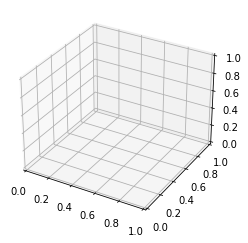

In [284]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig_poly = plt.figure()
ax = fig_poly.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

zs = t_trial[2]

poly = PolyCollection(t_vert, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

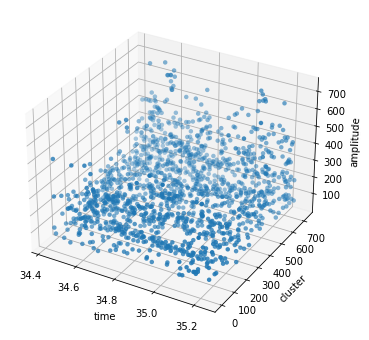

In [288]:
plt_3d_scatter(t_trial[0],t_trial[1],t_trial[2], 'time', 'cluster', 'amplitude')

In [272]:
print(t_trial[0], t_trial[1])

[33.01493333 33.01603333 33.0164     33.01643333 33.01686667 33.0169
 33.017      33.01706667 33.0181     33.01873333 33.01946667 33.0206
 33.02103333 33.02183333 33.02206667 33.02326667 33.0235     33.02396667
 33.02476667 33.02486667 33.02513333 33.02513333 33.02536667 33.02536667
 33.02556667 33.02626667 33.02916667 33.02933333 33.02966667 33.0302
 33.03083333 33.03093333 33.03103333 33.03106667 33.03113333 33.03123333
 33.03133333 33.03193333 33.03203333 33.03233333 33.0324     33.03323333
 33.03373333 33.03413333 33.03446667 33.03576667 33.0359     33.0366
 33.03683333 33.03696667 33.03716667 33.03733333 33.038      33.03806667
 33.0384     33.03846667 33.03853333 33.03873333 33.03896667 33.039
 33.03906667 33.03913333 33.03913333 33.03923333 33.03946667 33.03953333
 33.04       33.04116667 33.04196667 33.04206667 33.04293333 33.043
 33.04316667 33.04323333 33.04386667 33.04433333 33.04436667 33.04506667
 33.046      33.047      33.04723333 33.0475     33.0478     33.04806667
 33.

In [ ]:
def cutter(spiketimes, moves):
    """cuts the datasets based on the wheel moves
    Args:
    spiketimes (np.ndarray):spike times accross different clusters
    """
    output=[]

In [30]:
def my_moving_window(x):
    y = np.zeros_like(x)
    for i in range(0, len(x)-1):
        y[i]=x[i+1]-x[i]
    return y

In [127]:
class data:
    def __init__(self, trial, times, clusters, direction):
        self.trial = trial
        self.trial.times = times
        self.trial.clusters = clusters
        self.trial.direction = direction

array([[  36.23898044,   43.50298044],
       [  45.08498044,   45.53298044],
       [  47.23698044,   47.66098044],
       ...,
       [3358.39598044, 3358.50998044],
       [3364.67198044, 3364.80398044],
       [3374.92498044, 3374.97598044]])